In [1]:
#import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
ds=pd.read_csv('avacado.csv')

In [4]:
#view the dataset
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
ds.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
#label encode the columns that have binary values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
for i  in ('region','year'):
    ds[i]=le.fit_transform(ds[i])

In [8]:
#dataset has dates column, lets check how dates affect the price
ds['Date']= pd.to_datetime(ds['Date'])
df_dates=pd.DataFrame()
df_dates['year']=ds['Date'].dt.year
df_dates['month']=ds['Date'].dt.month_name()
df_dates['day']=ds['Date'].dt.day_name()
df_dates['price']=ds['AveragePrice']
df_dates.head()

,year,month,day,price
0,2015,December,Sunday,1.33
1,2015,December,Sunday,1.35
2,2015,December,Sunday,0.93
3,2015,June,Friday,1.08
4,2015,November,Sunday,1.28


In [9]:
#check teh unique values in the dates
print(df_dates['year'].unique())
print(df_dates['month'].unique())
print(df_dates['day'].unique())

[2015 2016]
['December' 'June' 'November' 'August' 'January' 'October' 'April'
 'September' 'February' 'July' 'May' 'March']
['Sunday' 'Friday' 'Tuesday' 'Monday' 'Thursday' 'Saturday' 'Wednesday']


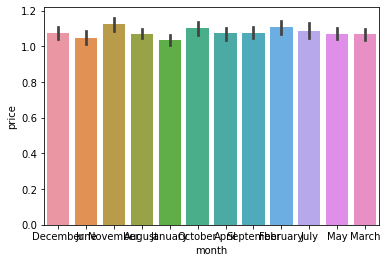

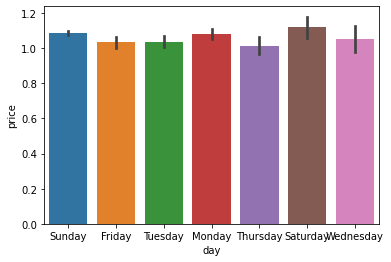

In [10]:
#plot months and days against prices
sns.barplot(x='month',y='price',data=df_dates)
plt.show()
sns.barplot(x='day',y='price',data=df_dates)
plt.show()

From above plots we can see that price does not vary much wrt to days or months

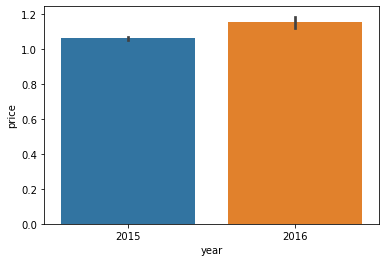

In [11]:
sns.barplot(x='year',y='price',data=df_dates)
plt.show()
#there is a slight difference in price wrt year

In [12]:
#the price does not vary much with the days or months so we can completely drop the column as we have the column for year already in the dataset
ds.drop('Date',axis=1,inplace=True)

In [13]:
#check unique values in type column
print(ds['type'].unique())

['conventional']


In [15]:
#drop type column as has only 1 value
ds.drop('type',axis=1,inplace=True)

In [16]:
ds.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


In [81]:
ds.corr()

,AveragePrice,Total Volume,4046,4770,Total Bags,Large Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.100567,-0.111597,-0.177480,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.934347,0.967689,0.910226,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.898570,0.930395,0.884229,-0.040439,0.269481
4770,-0.100567,0.934347,0.898570,1.000000,0.926405,0.840523,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.926405,1.000000,0.911336,0.090108,0.190001
Large Bags,-0.177480,0.910226,0.884229,0.840523,0.911336,1.000000,-0.018678,0.297452
year,0.178683,-0.004189,-0.040439,0.029222,0.090108,-0.018678,1.000000,-0.470472
region,-0.229408,0.236579,0.269481,0.138092,0.190001,0.297452,-0.470472,1.000000


In [82]:
ds.describe()

,AveragePrice,Total Volume,4046,4770,Total Bags,Large Bags,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,5.040550e+04,2.935974e+05,4.264205e+04,0.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.377812e+05,7.579765e+05,1.182157e+05,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,0.000000e+00,3.311770e+03,0.000000e+00,0.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,9.112500e+02,3.620689e+04,5.407400e+02,0.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,7.688170e+03,7.397906e+04,5.044350e+03,0.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,2.916730e+04,1.576097e+05,2.926767e+04,0.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.381516e+06,6.736304e+06,1.121076e+06,1.000000,50.000000


In [ ]:
#observing the Xlargebags column we can see that 50% values are zeroes and theres also a lot of difference between 75% and max
#hence dropping the column all together
ds.drop('XLarge Bags',axis=1,inplace=True)

In [ ]:
target=['AveragePrice']
numerical_col=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags']

In [ ]:
for i in numerical_col:
    plt.hist(ds[i])
    plt.show()

In [ ]:
for i in numerical_col:
    sns.boxplot(ds[i])
    plt.show()

In [ ]:
from scipy.stats import zscore
for i in numerical_col:
    z_score=abs(zscore(ds[i]))
    print(z_score)

In [ ]:
z_arr=ds.loc[(z_score<3)]
len(z_arr)

In [ ]:
ds.shape

In [ ]:
#check correlation
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(),color='k',annot=True)

In [ ]:
#4225 and small bags correlate very lessw ith the avg price hence dropping
ds_orignal=ds
ds1=ds
ds1.drop(['4225','Small Bags'],axis=1,inplace=True)

In [ ]:
corr_ds=pd.DataFrame(ds1.corr())
corr_ds['AveragePrice']

In [ ]:
#scaling the numerical variables
from sklearn.preprocessing import PowerTransformer
numerical_col_dropped = ['Total Volume','4046','4770','Total Bags','Large Bags']
pt=PowerTransformer()
scale = pt.fit_transform(ds1[numerical_col_dropped])
scale = pd.DataFrame(scale,columns=numerical_col_dropped)

In [ ]:
ds1=ds1.drop(columns=numerical_col_dropped,axis=1)
ds1=ds1.merge(scale,left_index=True,right_index=True,how='left')
ds1.head()

In [ ]:
x=ds1.iloc[:,1:]
y=ds1['AveragePrice']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
r2_score(y_test,pred_lr)

In [ ]:
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size = .30,random_state=i)
    lr.fit(x1_train,y1_train)
    pred = lr.predict(x1_test)
    z=r2_score(y1_test,pred)
    if z>r2_scr:
        r2_scr = z
        random_state=i

In [ ]:
print(r2_scr,random_state)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
r2_score(y_test,pred_rfr)

In [ ]:
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size = .30,random_state=i)
    rfr.fit(x1_train,y1_train)
    rfr_pred = rfr.predict(x1_test)
    z=r2_score(y1_test,rfr_pred)
    if z>r2_scr:
        r2_scr = z
        random_state=i

In [ ]:
print(r2_scr,random_state)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('mse','mae'),'n_estimators':[1,10,100],'max_depth':[10,20,30,40,50]}
clf=GridSearchCV(rfr,parameters)
clf.fit(x1_train,y1_train)
print(clf.best_score_)
print(clf.best_estimator_.criterion)
print(clf.best_params_)

In [ ]:
rfr1=RandomForestRegressor(criterion='mse',max_depth=30)
rfr1.fit(x_train,y_train)
pred_rfr1 = rfr1.predict(x_test)
r2_score(y_test,pred_rfr1)

In [ ]:
#finalize regression model at default values and random state =47
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size = .30,random_state=47)
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
pred_rfr = rfr.predict(x1_test)
r2_score(y1_test,pred_rfr)

In [ ]:
#pickle tyhe model
import joblib
joblib.dump(rfr,'avacado_regression.pkl')

In [ ]:
ds1.region.unique()

In [ ]:
ds1.dtypes

In [ ]:
ds1=ds1[['AveragePrice','year','Total Volume','4046','4770','Total Bags','Large Bags','region']]

In [ ]:
ds1.head()

In [ ]:
x=ds1.iloc[:,:-1]
y=ds1['region']

In [ ]:
print(x.shape,y.shape)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22,random_state=43)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
svc=svm.SVC(kernel='linear',C=100)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred),classification_report(y_test,svc_pred))

In [ ]:
y.head()

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','rbf'),'C':[0.01,0.1,1,10,100]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

In [ ]:
svc=svm.SVC(kernel='rbf',C=100)
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred),classification_report(y_test,svc_pred))

In [ ]:
import joblib
joblib.dump(svc,'avacado_region.pkl')